<a href="https://colab.research.google.com/github/nicolesaade/WorldHappinessReportAnalysis/blob/main/WorldHappinessReport_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Preparation

##1(a) Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1(b) Dictionaries

##1(c) Load Data & Fill in Missing Values

In [84]:
import statsmodels.api as sm
import pandas as pd
# Load the data
data = pd.read_csv('happiness_dataset.csv')
print(data.isnull().sum())
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(x.mean()))
print(data.isnull().sum())
for feature in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
    data[feature] = data.groupby('Country name')[feature].transform(lambda x: x.fillna(0))
print(data.isnull().sum())

data.head()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64
Country name                         0
year                                 0
Life Ladder                          0
Log GDP per capita                   9
Social support                       1
Healthy life expectancy at birth    50
Freedom to make life choices         0
Generosity                           9
Perceptions of corruption           30
Positive affect                     24
Negative affect                     16
dtype: int64
Country name                         0
year                                 0
Life Ladder                

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


##1(d) Create a DataFrame with mean of 2018-2023 by country

In [85]:
mean_df = data[data['year'].between(2018, 2023)].groupby('Country name').mean()
# Remove NaN values
mean_df = mean_df.dropna()
# Select the features
mean_df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Afghanistan,2020.6,2.046400,7.553477,0.395600,54.4200,0.351600,-0.035338,0.853800,0.271000,0.510000
Albania,2020.5,5.212667,9.573167,0.699500,69.1375,0.809333,-0.009833,0.883500,0.566833,0.280167
Algeria,2020.0,5.196200,9.330600,0.818800,66.5000,0.508000,-0.088000,0.709400,0.536600,0.267200
Argentina,2020.5,6.057000,9.985333,0.893333,67.1750,0.827000,-0.139500,0.828833,0.712500,0.318667
Armenia,2020.6,5.382400,9.606600,0.797600,67.5400,0.811200,-0.169600,0.670200,0.548800,0.467000


#2. Identify Country Groups

Cluster countries with 1)K-Means,  using the following 7 variables: life ladder, logGDP per capita, social support, healthy life expectancy at birth, freedom to make life choices, generosity and perceptions of corruption.

##2(a) Identify Number of Clusters

Text(0, 0.5, 'Inertia')

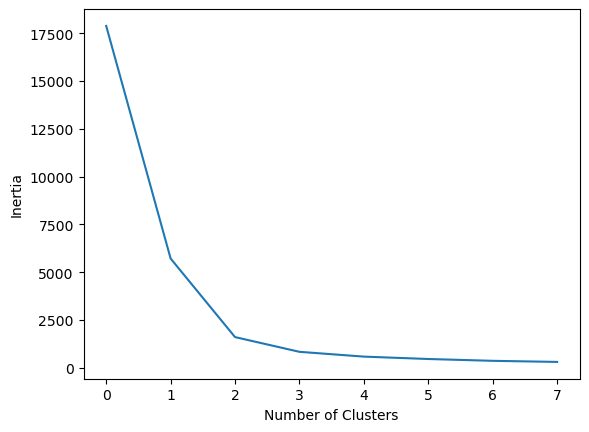

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1,9):
  model =KMeans(k, n_init=10, random_state=42)
  model.fit(mean_df) #df name??
  i = model.inertia_
  inertia.append(i)

plt.plot(inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

2  clusters
Silhouette Score:  0.8848092025089114
Subjects per Cluster:  [145   3] 

3  clusters
Silhouette Score:  0.6235559040196655
Subjects per Cluster:  [96  3 49] 

4  clusters
Silhouette Score:  0.5496260561535827
Subjects per Cluster:  [40  3 45 60] 

5  clusters
Silhouette Score:  0.49484082462694184
Subjects per Cluster:  [22  3 50 45 28] 

6  clusters
Silhouette Score:  0.47552631218276714
Subjects per Cluster:  [48  3 32 35 26  4] 



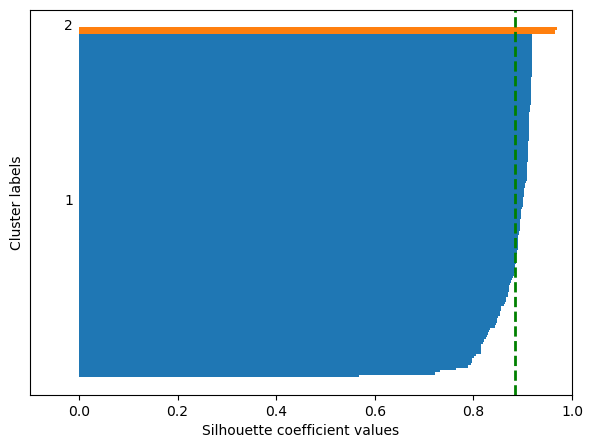

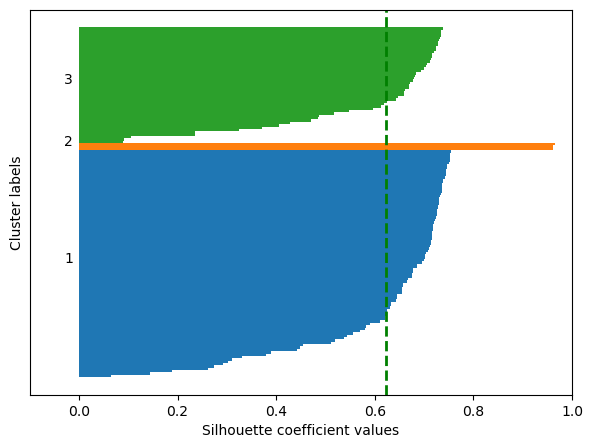

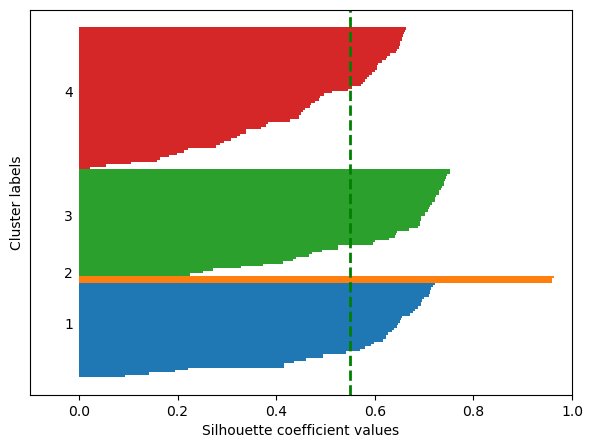

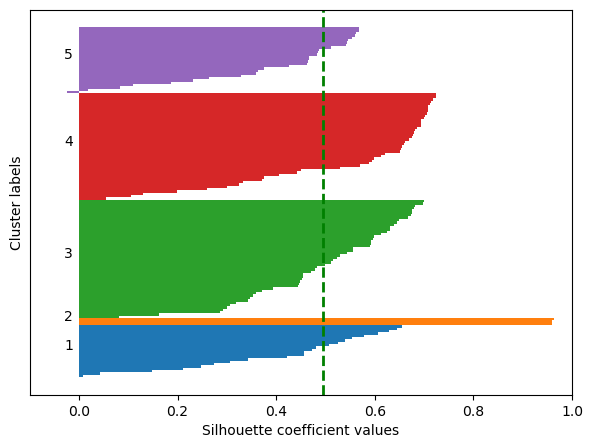

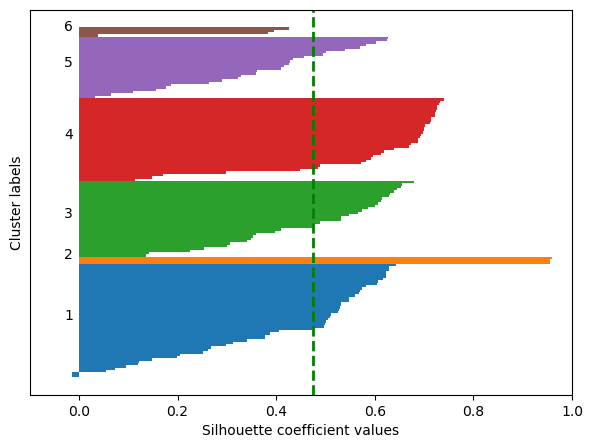

In [87]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def model_KMeans(df, k):
  model = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)
  y_pred = model.labels_
  print(k, ' clusters')
  print('Silhouette Score: ', silhouette_score(df, y_pred))
  print('Subjects per Cluster: ', pd.Series(y_pred).value_counts().sort_index().values, '\n')

  display_silhouette(k, df, y_pred)

  return y_pred

def display_silhouette(k, df, y_pred):
    silhouette_vals = silhouette_samples(df, y_pred)

    plt.figure(figsize=(7, 5))
    y_ticks = []
    y_lower = y_upper = 0
    for i, cluster in enumerate(np.unique(y_pred)):
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    avg_score = np.mean(silhouette_vals)
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')

    return plt

for k in range(2, 7): #Set number of clusters to test
  model_KMeans(mean_df, k) #df name?

##2(b) K-Means with Optimal Number of Clusters

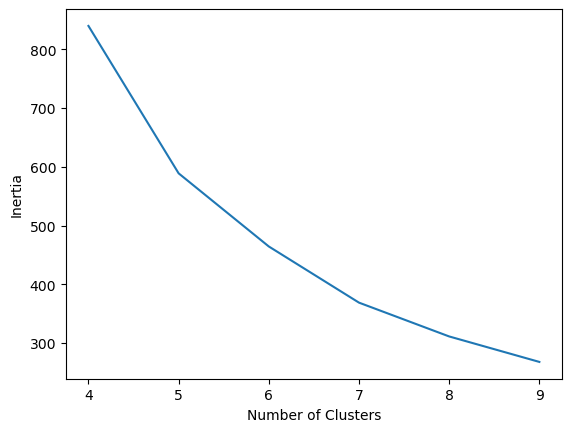

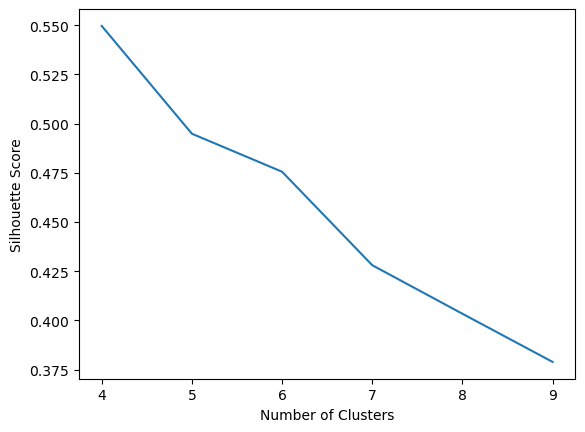

The cluster number with the best silhouette score is 2


In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

for k in range(4, 10): # Set the range of number of clusters to test
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(mean_df) # Use your dataframe here
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(mean_df, model.labels_))

# Plot the inertia values
plt.plot(range(4, 10), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Plot the silhouette scores
plt.plot(range(4, 10), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##2(c) Characteristics by Cluster

Heatmap of mean of variables

##2(d) Cluster labels on Worldmap

In [89]:
import plotly.express as px
fig = px.choropleth(df, locations="country", #set df name
                    locationmode='country names',
                    color="gdpp",##change

)
fig.show()

NameError: name 'df' is not defined

##2(e) Cluster labels on pairplot, PCA, bi-plot

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a copy of the mean_df dataframe
df_copy = mean_df.copy()

# Add the cluster labels to the dataframe
df_copy['Cluster'] = y_pred

# Pairplot
sns.pairplot(df_copy, hue='Cluster')
plt.show()

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_copy.iloc[:, :-1])  # Exclude the cluster column
df_copy['PCA1'] = pca_result[:, 0]
df_copy['PCA2'] = pca_result[:, 1]

# Bi-plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_copy, x='PCA1', y='PCA2', hue='Cluster')
for i, feature in enumerate(df_copy.columns[:-4]):  # Exclude the cluster and PCA columns
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature, color='r')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Bi-plot')
plt.show()
